# ¡Hola Hector!

Mi nombre es Ezequiel Ferrario, soy code reviewer en Practicum y tengo el agrado de revisar el proyecto que entregaste.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - *por favor, no los muevas, no los modifiques ni los borres*.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.
</div>

¡Empecemos!

# Contents <a id='back'></a>

* [Introducción](#intro)
* [Inicialización](#init)
    * [Preparar datos](#prepatation)
    * [Corrección de datos](#correction)
* [Descripción de los datos](#data_review)
* [Gráficos descriptivos](#graphics)
    * [Conclusiones gráficos](#graphics_conclusions)
* [Prueba de hipótesis](#hypotheses)
    * [Declaraciones de hipótesis](#hypotheses_declaration)
    * [Prueba Levene](#levene)
        * [Conclusión Levene](#levene_conclusion)
    * [Prueba T-student](#tstudent)
    * [Conclusiones hipótesis](#conclusions)
* [Conclusiones](#end)

# Viajes en Taxi en la ciudad de Chicago <a id='intro'></a>

Una empresa de viajes compartidos que se está lanzando en Chicago, busca patrones en la información disponible buscando las preferencias de los pasajeros y el impacto de factores externos (clima) en los viajes.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hector, recorda realizar una tabla de contenidos, esto hara que sea mas facil navegar por el trabajo ademas de saber que nos vamos a encontrar con el mismo.
   
</div>

## Inicialización <a id='init'></a>

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

 ## Cargar los datos <a id='data_review'></a>
 
 Se cargan las tablas de datos

In [2]:
try:
    companies = pd.read_csv('moved_project_sql_result_01.csv')
    trips = pd.read_csv('moved_project_sql_result_04.csv')
    trips_weather = pd.read_csv('moved_project_sql_result_07.csv')
except:
    companies = pd.read_csv('/datasets/project_sql_result_01.csv')
    trips = pd.read_csv('/datasets/project_sql_result_04.csv')
    trips_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

### Preparación de datos <a id='preparation'></a>

Se muestra la información y las primeras filas de cada tabla.

In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
companies.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [5]:
companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
companies.duplicated().sum()

0

La tabla companies no cuenta con valores duplicados, tiene 64 registros de compañías que ofrecen el servicio de taxi en la ciudad de Chicago.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda utilizar el metodo describe(). Este es vital para toda exploracion rapida de los datos iniciales, nos proporcionara un panorama de aquellas variables numericas.   
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Verifica si existen datos duplicados.</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Describi lo que observas con esta exploracion (identifica los datos faltantes) y conclui al respecto con un markdown.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido</div>

In [7]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [9]:
trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [10]:
trips.duplicated().sum()

0

La tabla trips, muestra los viajes promedio destino hacia los barrios de Chicago, no cuenta con datos duplicados o ausentes, se cuenta con 94 registros diferentes.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda utilizar el metodo describe(). Este es vital para toda exploracion rapida de los datos iniciales, nos proporcionara un panorama de aquellas variables numericas.   
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Verifica si existen datos duplicados.</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Describi lo que observas con esta exploracion (identifica los datos faltantes) y conclui al respecto con un markdown.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido</div>

In [11]:
trips_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
trips_weather.sort_values(by='start_ts').head(100)

,start_ts,weather_conditions,duration_seconds
893,2017-11-04 00:00:00,Good,1560.0
552,2017-11-04 01:00:00,Good,0.0
267,2017-11-04 02:00:00,Good,2956.0
741,2017-11-04 04:00:00,Good,1595.0
88,2017-11-04 04:00:00,Good,1333.0
...,...,...,...
85,2017-11-04 09:00:00,Good,1740.0
220,2017-11-04 10:00:00,Good,1717.0
307,2017-11-04 10:00:00,Good,2444.0
197,2017-11-04 10:00:00,Good,1883.0


In [13]:
trips_weather.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [14]:
trips_weather.duplicated().sum()

197

En esta tabla se encuentran valores duplicados, esto se debe a que el mismo día y hora salen diferentes viajes desde Loop al aeropuerto, por lo que no podemos descartarlos como duplicados así que se dejarán sin tratamiento en el Dataframe.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda utilizar el metodo describe(). Este es vital para toda exploracion rapida de los datos iniciales, nos proporcionara un panorama de aquellas variables numericas.   
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Verifica si existen datos duplicados.</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Describi lo que observas con esta exploracion (identifica los datos faltantes) y conclui al respecto con un markdown.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido</div>

### Corregir los datos <a id='correction'></a>

En la tabla `trips_weather` la columna *start_ts* tiene un formato object, y se cambiará por un Timestamp

In [15]:
trips_weather['start_ts'] = pd.to_datetime(trips_weather['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [16]:
trips_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [17]:
trips_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien.</div>



## Principales barrios y compañías con viajes promedio <a id='graphics'></a>

Se utiliza `pivot_table` para ordenar los datos de mayor a menor en la tabla *trips* y en la tabla *companies*, de los cuales se grafica para mostrar las diferencias entre barrios y compañías

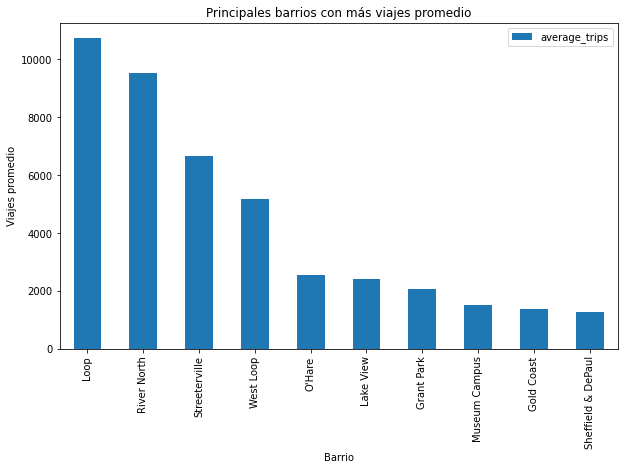

In [18]:
(trips
.pivot_table(index='dropoff_location_name',values='average_trips')
.sort_values(by='average_trips',ascending=False)
.head(10)
.plot(kind="bar", figsize=(10,6),
      title="Principales barrios con más viajes promedio",
      xlabel='Barrio', ylabel='Viajes promedio')
)
plt.show()

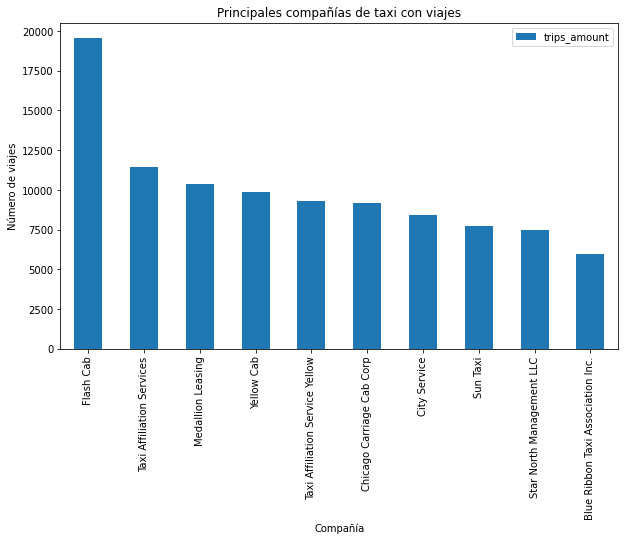

In [19]:
( companies
 .pivot_table(index='company_name',values='trips_amount')
 .sort_values(by='trips_amount',ascending=False)
 .head(10)
 .plot(kind='bar',figsize=(10,6),
       title='Principales compañías de taxi con viajes',
       xlabel='Compañía',ylabel='Número de viajes')
)
plt.show()

### Conclusiones de gráficos <a id='graphics_conclusions'></a>

Los gráficos de los barrios y las empresas muestran una caída muy abrupta, es decir existe una compañía que abarca una gran cantidad de viajes, lo mismo con los barrios, el barrio de *Loop* es el que tiene mayor cantidad de viajes finalizados.
Esto nos lleva a preguntarnos si la mayoría de los viajes son realizados por la misma compañía.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buenos graficos.</div>



## Prueba de hipótesis <a id='hypotheses'></a>

### Hipótesis: <a id='hypotheses_declaration'>
`H0: La duración promedio de los viajes desde el Loop hasta el aeropuerto Internacional O'Hare no cambia los sábados lluviosos.`

`Ha: La duración promedio de los ciajes desde el Loop hasta el aeropuerto Internacional O'Hare cambia los sábados lluviosos.`




<div class="alert alert-block alert-danger">
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>
    
Las hipotesis serian las siguientes:

Hipótesis nula: La duración promedio de los viajes desde el Loop hasta el aeropuerto Internacional O'Hare es igual los sábados lluviosos.
Hipótesis alternativa: La duración promedio de los viajes desde el Loop hasta el aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Tene cuidado porque puede cambiar sustancialmente todo.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #5</b> <a class="tocSkip"></a>
    
Corregido.</div>

In [20]:
#Nivel de significancia:
alfa=0.05

In [21]:
rain_trips = trips_weather.query("weather_conditions=='Bad'")['duration_seconds']
good_trips = trips_weather.query("weather_conditions=='Good'")['duration_seconds']

### Prueba Levene con varianzas diferentes <a id='levene'></a>

In [22]:
#H0: Las varianzas son iguales
#Ha: Las varianzas son diferentes
alpha=0.05

result = st.levene(rain_trips, good_trips, center='median')

if(result.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
    print( )
    print('p-value: ', result.pvalue)
else:
    print('No rechazamos la hipótesis nula')
    print( )
    print('p-value: ',result.pvalue)

No rechazamos la hipótesis nula

p-value:  0.5332038671974493


#### Conclusión Levene <a id='levene_conclusion'></a>

Con la prueba de Levene encontramos que las varianzas son iguales, ya con esta información se realizará la prueba t-student con varianzas iguales.

### Prueba T-student <a id='tstudent'></a>

In [23]:
results = st.ttest_ind(
rain_trips,
good_trips,
equal_var=True
)
if(results.pvalue<alfa):
    print('Rechazamos la hipótesis nula')
    print( )
    print('p-value: ',results.pvalue)
else:
    print('No rechazamos la hipótesis nula')
    print( )
    print('p-value: ',results.pvalue)

Rechazamos la hipótesis nula

p-value:  6.517970327099473e-12


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
El parametro equal_var es muy importante para este tipo de pruebas ya que le estamos indicando en este caso (False) que las varianzas para cada conjunto son diferentes. Si fueran iguales, puede que el resultado sea otro, ya que se calcula de forma diferente. Por esto es importante, cuando realizamos esta prueba. Confirmar si las varianzas son iguales o no para ambos conjuntos. Para esto se realizan pruebas para identificar si son iguales o no las varianzas.

Al realizarla ajusta el parametro.
</div></div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Una de las pruebas que hablo es la prueba de Levene. Con esta determinaras si existe -o no- igualdad de varianzas. En tu caso simplemente le indicas que hay igualdad (equal_var = True) pero la unica forma para determinar esto es utilizar este tipo de pruebas. Por lo que te invito a utilizarla, dependiendo del resultado modifica o no el parametro equal_var.

Las pruebas estadísticas están diseñadas para tomar en cuenta el tamaño de la muestra y calcular si la diferencia observada en las varianzas es estadísticamente significativa o si podría deberse al azar.</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
Hector, lo que habias realizado del t estudent estaba bien, simplemente era ajustar el parametro equal_var.
 
En este caso haces muy bien la prueba de levene, donde alfa es menor al resultado por lo que se afirma la igualdad de varianzas (equal_var = True)
    
Ahora te esta faltando el t.estudent para verificar ambas hipotesis, realizalo con el parametro en True y con eso estaria bien el trabajo.</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>
La prueba de Levene va primero debido a que es la que determina si hay igualdad de varianzas o no ( si alpha es menor al resultado NO SE RECHAZA LA HIPOTESIS NULA -Que hay igualdad de varianzas- por lo que es equal_var = True) . Una vez que tenemos esto procedemos a hacer el t.student. Si bien en tu caso no afecta como lo hagas. Tiene sentido que sea al reves y como estamos en un espacio de aprendizaje necesito saber que lo entendiste.

Ademas, te marque que las hipotesis la tenes al reves. En el resultado actual la duracion no cambiaria si llueve, algo que si analisamos empiricamente es muy poco probable que pase  ya que la lluvia hace que se retrase todo generalmente, con esto no digo que tenga que coincidir lo estadistico con el analisis pero en este caso al modificar la premisa cambia el resultado que hiciste.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #5</b> <a class="tocSkip"></a>
    
Corregido.</div>

### Conclusión de hipótesis <a id='conclusion'></a>

La prueba de hipótesis de Levene nos ayudo a encontrar si las varianzas de los Dataframes eran iguales, esto para poder definir la prueba t-student de mejor manera.
Con la prueba t-student se determina que los tiempos de viaje desde *Loops* al *Aeropuerto Internacional O'Hare* cambia en los sábados lluviosos. Es decir con lluvia los tiempos de traslados son diferentes los sábados a cuando el día es soleado. Esto es lógico de manera empírica, ya que se sabe que la lluvia y las tormentas suelen entorpecer el tráfico aumentando el tiempo en que nos trasladamos por las ciudad.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

La conclusion queda sujeta a modificacion, pero es la conclusion del anterior sector.
</div></div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>
Con lo que te explique en el punto anterior es probable que cambie tu conclusion de hipotesis.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #5</b> <a class="tocSkip"></a>
    
Corregido.</div>


## Conclusión final <a id='end'></a>

Despúes de realizar el análisis inicial de los datos por medio de SQL se obtuvieron los archivos de donde se cargaron los DataFrames para trabajarlos con Python.

El primer paso fue cargar las librerías necesarias, `pandas` para trabajar con los DataFrames, `numpy` para cálculos que pudieran requerirse en el ánalisis, de la librería `scipy`, se cargó el método `stats` para realizar las pruebas de hipótesis y por último se cargó `matplotlib` para realizar los gráficos y darles formato.
Con las librerías cargadas, se guardaron los datos en 3 diferentes Dataframes, *companies* donde se guaradron los viajes por cada compañía, *trips* los viajes hacia cada colonia  y *trips_weather* con las condiciones ambientales por hora los sábados.

Ya con los Dataframes guardados se analizaron cada uno buscando incongruencias en los datos que contenían, valores ausentes o duplicados, para *companies* y *trips* no hubo ninguno de estos casos, mientras que para *trips_weather* se encontraron valores duplicados, lo cuales no podemos eliminar del conjunto de datos debido a que pueden ser viajes que salieron a la misma hora hacia diferentes destinos por diferentes compañías, sin más información para ligar esto se decidió dejar el Dataframe así. También en los datos *trips_weather*, en la columna **start_ts** se cambio el tipo de dato a Timestamp para poder manejarlo de forma más sencilla.

Con los datos preparados, analizados de como se obtuvieron y la naturaleza de estos, se realizaron gráficos de barras para mostrar las 10 principales compañías de acuerdo con los viajes que se presentan en el Dataframe, usando el mismo concepto se hizo lo mismo con los 10 principales barrios con mayor número de viajes promedio.

Tomando el Dataframe *trips_weather* se realizó la prueba de hipótesis para encontrar si el tiempo de viaje cambiaba dependiendo del clima, se realizó una prueba t-student, para realizar una prueba más precisa realizamos una prueba de Levene para encontrar si las varianzas de los datos son iguales o diferentes, encontrándose que las varianzas son iguales procedimos con la prueba t-student, con ella se determinó que el tiempo promedio de viaje del barrio Loop al aeropuerto internacional O'Hare cambia con el clima. Es decir el clima afecta el promedio de tiempo de viaje, ya que en un sábado soleado el tiempo promedio de traslado es menor que un día con lluvia.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Falta la conclusion general (seccion aparte). En la cual deberas describir y concluir sobre todo lo que hiciste en este trabajo (desde la importacion y carga, pasando por los graficos hasta las pruebas).
    
Todo esto comentando porque decidiste lo que hiciste.
</div></div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido. Te quedo muy bien. Simplemente a modo consejo utiliza mas divisiones (Saltos de linea). 

Me gusto mucho!.</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hector, te felicito por tu trabajo. Si bien parece que hay mucho marcado en rojo, son detalles. Has hecho un trabajo muy completo, abarcaste todo lo que se pedia de manera sencilla y concreta.

Me gustaron tus graficos porque fueron concisos. Como consejo de estos, a veces los colores (y mantener los mismos) nos pueden ayudar.
    
Como correcciones te deje algunas que son comunes de codigo y otras que son de forma (la tabla de contenido y secciones).
    
Espero que haya quedado claro el equal var pero de igual manera estoy disponible para explicarlo nuevamente.
    
Saludos.
</div></div>

<div class="alert alert-block alert-danger">
<b>Comentario General #2</b> <a class="tocSkip"></a>

Hector, corregiste todo de forma impecable. Te quedo muy bien, tu conclusion general me parecio muy buena.

Queda hacer la prueba que te digo en la seccion de la prueba de hipotesis y con eso ya pasaria a estar aprobado el trabajo.

Saludos.</div>


<div class="alert alert-block alert-danger">
<b>Comentario General #3</b> <a class="tocSkip"></a>

Hector, el error se mantiene en la misma seccion pero ahora por otra cosa, eliminaste la parte de t.student que estaba muy bien. Mis disculpas si no fui claro o no se entendio. Queda agregar la prueba con el nuevo valor y estaria perfecto. Modifica si es necesario la hipotesis ya que lo tendre en cuenta.

Al ser minimo el error y para que tengas tu trabajo aprobado estare atento a cuando lo entregues para corregirlo. Saludos</div>

<div class="alert alert-block alert-danger">
<b>Comentario General #4</b> <a class="tocSkip"></a>

Hector, fui mas claro con lo que se busca en este proyecto. Soy incisivo porque quiero que entiendas el punto de la prueba de hipotesis, algo que te va a servir mucho. 

Recorda modificar las conclusiones. Solo tenes que modificar el orden y cambiar eso.

Saludos.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #5</b> <a class="tocSkip"></a>
    
Corregido lo que te marque tu trabajo pasa a estar aprobado.

   
Exitos en lo que viene Hector, saludos.</div>